# 1D Poisson with finite differences

We want to obtain a numerical approximation of the solution to

$$
-\phi''(x) = \rho(x)\,,\qquad x\in(a,b)\subset \mathbb R\,,
$$

with different boundary conditions. Let us start by discretizing the domian $(a,b) = (0,2\pi)$:

In [1]:
import numpy as np

a = 0
b = 2*np.pi
L = b - a
N = 20
h = L/N
Xs = np.linspace(a, b, N + 1)
xs = Xs[1:-1]

Let us start with the case of Dirichlet boundary conditions. We will use the _method of manufactured solutions_ to test our code. Hence, we assume the true solution reads $\phi(x) = x \cos(x)$ and compute the corresponding right-hand-side (RHS) and Dirichlet boundary conditions:

In [2]:
phi_exact = lambda x: x*np.cos(x)

rho = lambda x: 2*np.sin(x) + x*np.cos(x)
rho_h = rho(xs)

alpha = 0
beta = 2*np.pi
rho_h[0] += alpha/h**2
rho_h[-1] += beta/h**2

Let us also plot the true solution and the RHS:

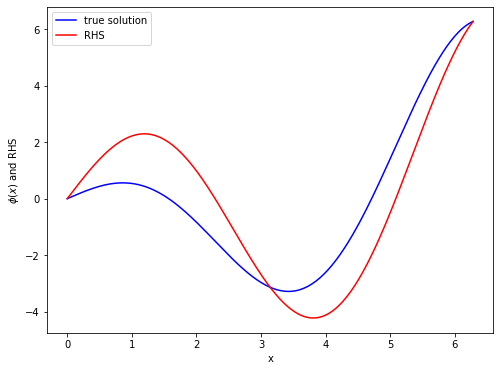

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)

x_plot = np.linspace(a, b, 200)
plt.figure()
plt.plot(x_plot, phi_exact(x_plot), 'b', label='true solution')
plt.plot(x_plot, rho(x_plot), 'r', label='RHS')
plt.xlabel('x')
plt.ylabel('$\phi(x)$ and RHS')
plt.legend()

Now we are ready to create the matrix $A_h$ for Dirichlet boundary conditions:

In [4]:
dd = np.diag(np.ones(N-1)*2)
dd1 = np.diag(np.ones(N-2)*(-1), k= 1)
dd2 = np.diag(np.ones(N-2)*(-1), k= -1)
A = dd + dd1 + dd2
A /= h**2

Let us now solve the liner system and plot the difference with respect to the true solution:

Text(0.5, 0, 'x')

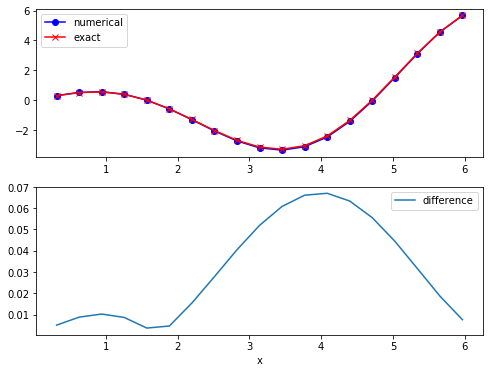

In [5]:
A_inv = np.linalg.inv(A)
phi_h = np.dot(A_inv, rho_h)
plt.figure
plt.subplot(211)
plt.plot(xs, phi_h, 'ob-', label='numerical')
plt.plot(xs, phi_exact(xs), 'xr-', label='exact')
plt.legend()
plt.subplot(212)
plt.plot(xs, np.abs(phi_h - phi_exact(xs)), label='difference')
plt.legend()
plt.xlabel('x')

The errors in the respective vector-norms are given by:

In [6]:
L1 = np.sum(np.abs(phi_h - phi_exact(xs)))
L2 = np.sqrt(np.sum(np.abs(phi_h - phi_exact(xs))**2))
Linf = np.max(np.abs(phi_h - phi_exact(xs)))
print('L1-error:', L1)
print('L2-error:', L2)
print('Linf-error:', Linf)

L1-error: 0.591851565806673
L2-error: 0.1694876857226486
Linf-error: 0.06703805862058321


## Dirichlet boundary condition

Now we should do this for different values of the grid parameter $h$ and test the convergence of our scheme:

number of cells:  8 
grid parameter: h = 0.7853981633974483
number of grid points:  9 

smallest eigenvalue:  0.2468037076916635


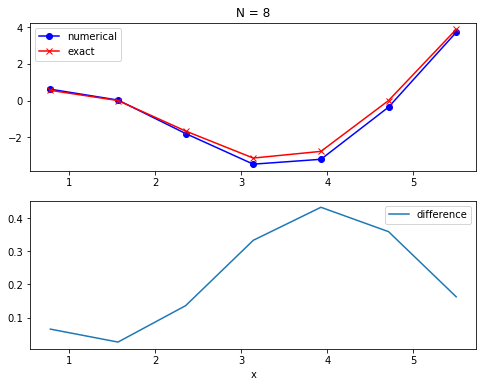

N =  8
L1-error: 1.190080650444081
L2-error: 0.6123001188231445
Linf-error: 0.43284764796312203 

number of cells:  16 
grid parameter: h = 0.39269908169872414
number of grid points:  17 

smallest eigenvalue:  0.2491978410112361


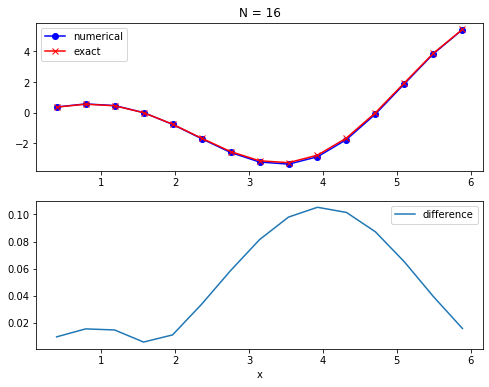

N =  16
L1-error: 0.2914008669118685
L2-error: 0.14891845018091462
Linf-error: 0.10527610540659982 

number of cells:  32 
grid parameter: h = 0.19634954084936207
number of grid points:  33 

smallest eigenvalue:  0.24979926688482967


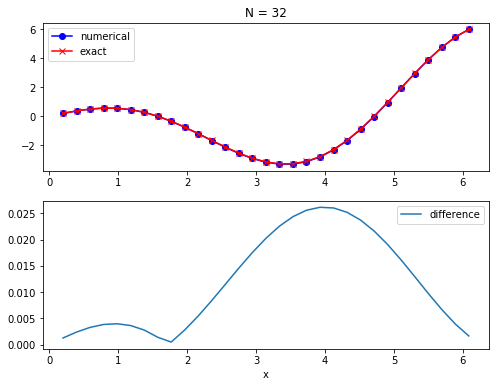

N =  32
L1-error: 0.07235179387321457
L2-error: 0.03697806628913174
Linf-error: 0.026140358556238752 

number of cells:  64 
grid parameter: h = 0.09817477042468103
number of grid points:  65 

smallest eigenvalue:  0.24994980462785477


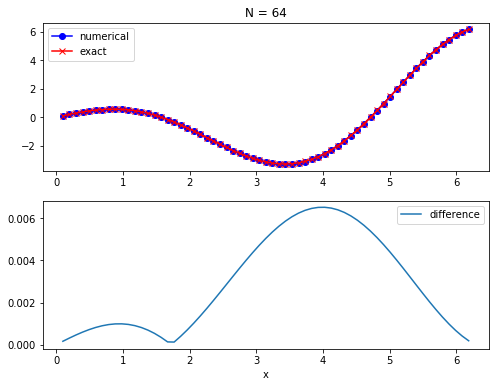

N =  64
L1-error: 0.01806554233768026
L2-error: 0.009228917446220977
Linf-error: 0.006529446142299999 

number of cells:  128 
grid parameter: h = 0.04908738521234052
number of grid points:  129 

smallest eigenvalue:  0.2499874504011419


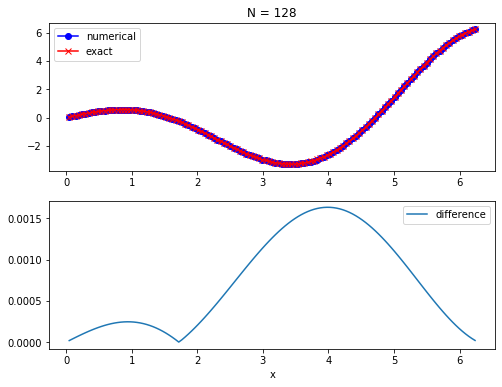

N =  128
L1-error: 0.004514228019777094
L2-error: 0.002306256307686983
Linf-error: 0.0016323459253766437 

number of cells:  256 
grid parameter: h = 0.02454369260617026
number of grid points:  257 

smallest eigenvalue:  0.24999686255142262


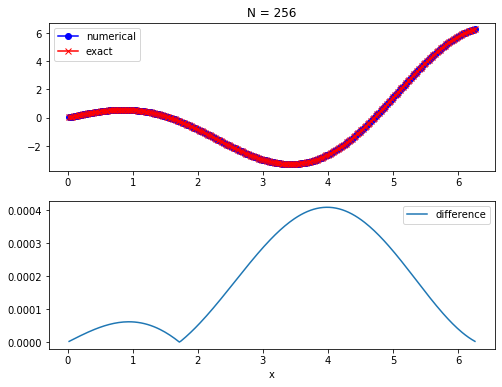

N =  256
L1-error: 0.0011285013244676262
L2-error: 0.0005765032905440014
Linf-error: 0.00040804288447171544 

number of cells:  512 
grid parameter: h = 0.01227184630308513
number of grid points:  513 

smallest eigenvalue:  0.24999921564588712


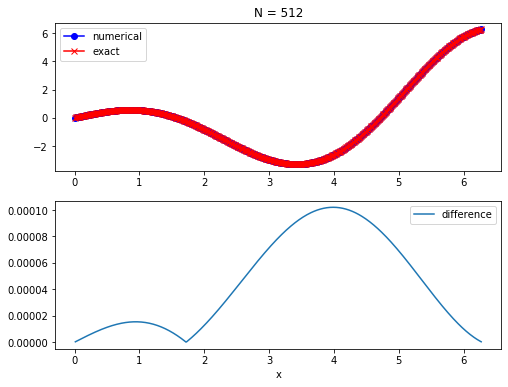

N =  512
L1-error: 0.0002821212358439791
L2-error: 0.00014412202420819263
Linf-error: 0.00010201323743075363 

number of cells:  1024 
grid parameter: h = 0.006135923151542565
number of grid points:  1025 

smallest eigenvalue:  0.24999980393429877


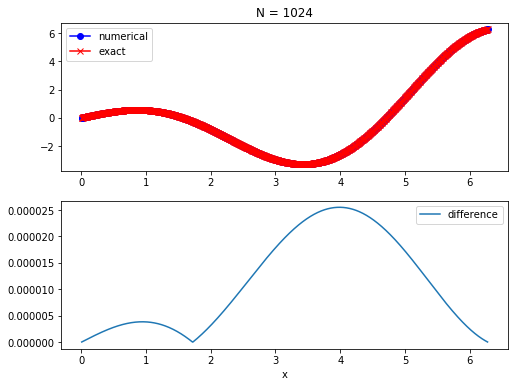

N =  1024
L1-error: 7.052997379097978e-05
L2-error: 3.603026830844394e-05
Linf-error: 2.5503138624483057e-05 

the loop has ended


In [7]:
N_vec = 2**np.arange(3, 11)
L1_vec = []
L2_vec = []
Linf_vec = []

for N in N_vec:
    h = L/N
    print('number of cells: ', N, '\ngrid parameter: h =', h)
    Xs = np.linspace(a, b, N + 1)
    print('number of grid points: ', np.size(Xs), '\n')
    x = Xs[1:-1]
    
    rho_h = rho(x)
    rho_h[0] += alpha/h**2
    rho_h[-1] += beta/h**2
    
    dd = np.diag(np.ones(N-1)*2)
    dd1 = np.diag(np.ones(N-2)*(-1), k= 1)
    dd2 = np.diag(np.ones(N-2)*(-1), k= -1)
    A = dd + dd1 + dd2
    A /= h**2
    lam_vec = np.linalg.eigvals(A)
    print('smallest eigenvalue: ', np.min(np.abs(lam_vec)))
    
    A_inv = np.linalg.inv(A)
    phi_h = np.dot(A_inv, rho_h)
    plt.figure
    plt.subplot(211)
    plt.plot(x, phi_h, 'ob-', label='numerical')
    plt.plot(x, phi_exact(x), 'xr-', label='exact')
    plt.title('N = ' + str(N))
    plt.legend()
    plt.subplot(212)
    plt.plot(x, np.abs(phi_h - phi_exact(x)), label='difference')
    plt.legend()
    plt.xlabel('x')
    plt.show()
    
    L1 = h*np.sum(np.abs(phi_h - phi_exact(x)))
    L2 = np.sqrt(h*np.sum(np.abs(phi_h - phi_exact(x))**2))
    Linf = np.max(np.abs(phi_h - phi_exact(x)))
    print('N = ', N)
    print('L1-error:', L1)
    print('L2-error:', L2)
    print('Linf-error:', Linf, '\n')
    
    L1_vec.append(L1)
    L2_vec.append(L2)
    Linf_vec.append(Linf)
    
print('the loop has ended')

In [8]:
L1_vec

[1.190080650444081,
 0.2914008669118685,
 0.07235179387321457,
 0.01806554233768026,
 0.004514228019777094,
 0.0011285013244676262,
 0.0002821212358439791,
 7.052997379097978e-05]

In [9]:
L2_vec

[0.6123001188231445,
 0.14891845018091462,
 0.03697806628913174,
 0.009228917446220977,
 0.002306256307686983,
 0.0005765032905440014,
 0.00014412202420819263,
 3.603026830844394e-05]

In [10]:
Linf_vec

[0.43284764796312203,
 0.10527610540659982,
 0.026140358556238752,
 0.006529446142299999,
 0.0016323459253766437,
 0.00040804288447171544,
 0.00010201323743075363,
 2.5503138624483057e-05]

## Mixed Dirichlet-Neumann boundary condition

Let us now consider the mixed boundary conditions:

number of cells:  8 
grid parameter: h = 0.7853981633974483
number of grid points:  9
size of x: 8 

smallest eigenvalue:  0.06229946025280962


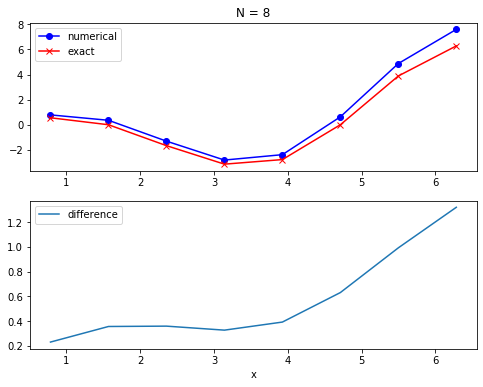

N =  8
L1-error: 3.6152923341134335
L2-error: 1.7019272762984776
Linf-error: 1.319089894887961 

number of cells:  16 
grid parameter: h = 0.39269908169872414
number of grid points:  17
size of x: 16 

smallest eigenvalue:  0.062449816721199265


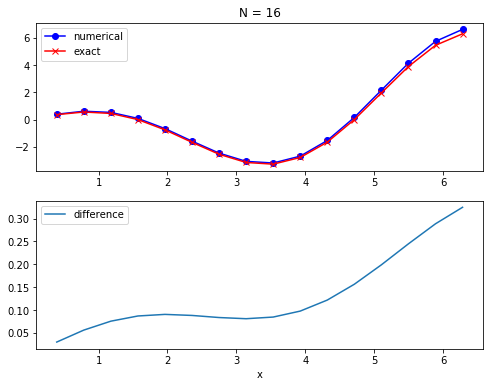

N =  16
L1-error: 0.8280304569484912
L2-error: 0.3917670698354361
Linf-error: 0.32465150308508317 

number of cells:  32 
grid parameter: h = 0.19634954084936207
number of grid points:  33
size of x: 32 

smallest eigenvalue:  0.06248745115697136


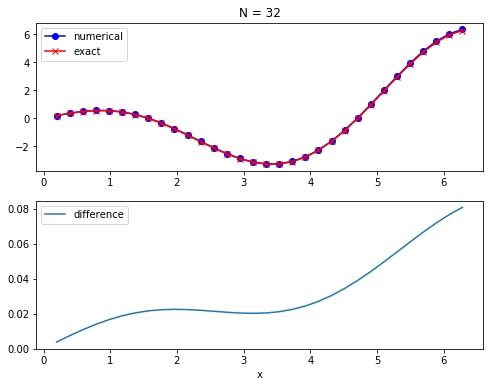

N =  32
L1-error: 0.19839351142664155
L2-error: 0.09411634195278082
Linf-error: 0.08084942168829379 

number of cells:  64 
grid parameter: h = 0.09817477042468103
number of grid points:  65
size of x: 64 

smallest eigenvalue:  0.06249686260031018


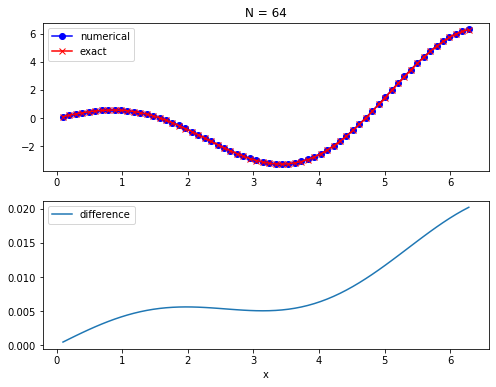

N =  64
L1-error: 0.04856698585822135
L2-error: 0.02307036299344136
Linf-error: 0.02019286568271994 

number of cells:  128 
grid parameter: h = 0.04908738521234052
number of grid points:  129
size of x: 128 

smallest eigenvalue:  0.06249921563828592


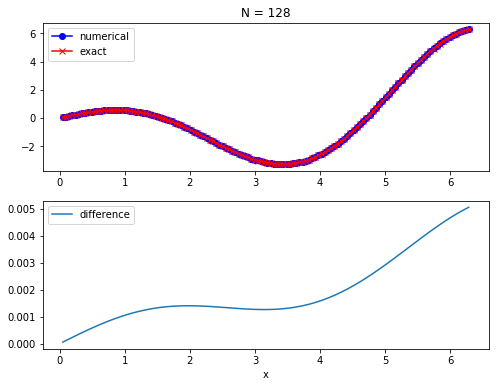

N =  128
L1-error: 0.012015426139276754
L2-error: 0.005711332287087375
Linf-error: 0.005046999884315007 

number of cells:  256 
grid parameter: h = 0.02454369260617026
number of grid points:  257
size of x: 256 

smallest eigenvalue:  0.062499803910930574


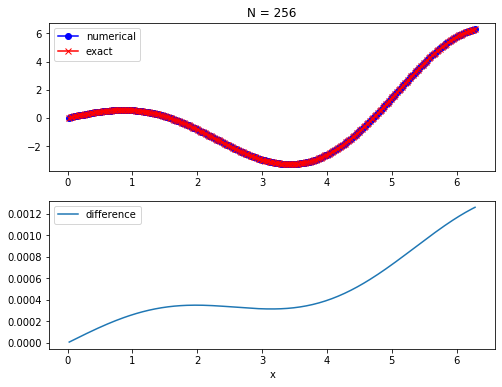

N =  256
L1-error: 0.002988222356354237
L2-error: 0.0014208644068843565
Linf-error: 0.0012616739615598505 

number of cells:  512 
grid parameter: h = 0.01227184630308513
number of grid points:  513
size of x: 512 

smallest eigenvalue:  0.062499950974721774


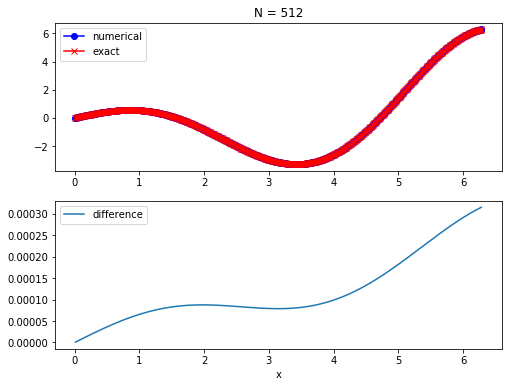

N =  512
L1-error: 0.0007451108422938047
L2-error: 0.0003543488721959712
Linf-error: 0.0003154137381375932 

number of cells:  1024 
grid parameter: h = 0.006135923151542565
number of grid points:  1025
size of x: 1024 

smallest eigenvalue:  0.06249998773228135


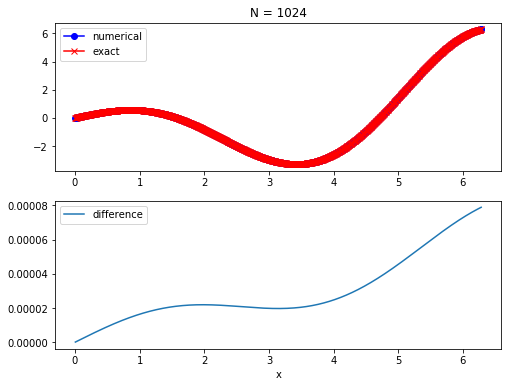

N =  1024
L1-error: 0.00018603522432031076
L2-error: 8.847905942406008e-05
Linf-error: 7.885314264388654e-05 

the loop has ended


In [11]:
N_vec = 2**np.arange(3, 11)
L1_vec = []
L2_vec = []
Linf_vec = []

gamma = 1.

for N in N_vec:
    h = L/N
    print('number of cells: ', N, '\ngrid parameter: h =', h)
    Xs = np.linspace(a, b, N + 1)
    print('number of grid points: ', np.size(Xs))
    x = Xs[1:]
    print('size of x:', np.size(x), '\n')
    
    rho_h = rho(x)
    rho_h[0] += alpha/h**2
    rho_h[-1] += 2*gamma/h
    
    dd = np.diag(np.ones(N)*2)
    dd1 = np.diag(np.ones(N-1)*(-1), k= 1)
    dd2 = np.diag(np.ones(N-1)*(-1), k= -1)
    A = dd + dd1 + dd2
    A[-1, -2] = -2.
    #print(A)
    A /= h**2
    lam_vec = np.linalg.eigvals(A)
    print('smallest eigenvalue: ', np.min(np.abs(lam_vec)))
    
    A_inv = np.linalg.inv(A)
    phi_h = np.dot(A_inv, rho_h)
    plt.figure
    plt.subplot(211)
    plt.plot(x, phi_h, 'ob-', label='numerical')
    plt.plot(x, phi_exact(x), 'xr-', label='exact')
    plt.title('N = ' + str(N))
    plt.legend()
    plt.subplot(212)
    plt.plot(x, np.abs(phi_h - phi_exact(x)), label='difference')
    plt.legend()
    plt.xlabel('x')
    plt.show()
    
    L1 = h*np.sum(np.abs(phi_h - phi_exact(x)))
    L2 = np.sqrt(h*np.sum(np.abs(phi_h - phi_exact(x))**2))
    Linf = np.max(np.abs(phi_h - phi_exact(x)))
    print('N = ', N)
    print('L1-error:', L1)
    print('L2-error:', L2)
    print('Linf-error:', Linf, '\n')
    
    L1_vec.append(L1)
    L2_vec.append(L2)
    Linf_vec.append(Linf)
    
print('the loop has ended')

In [12]:
L1_vec

[3.6152923341134335,
 0.8280304569484912,
 0.19839351142664155,
 0.04856698585822135,
 0.012015426139276754,
 0.002988222356354237,
 0.0007451108422938047,
 0.00018603522432031076]

In [13]:
L2_vec

[1.7019272762984776,
 0.3917670698354361,
 0.09411634195278082,
 0.02307036299344136,
 0.005711332287087375,
 0.0014208644068843565,
 0.0003543488721959712,
 8.847905942406008e-05]

In [14]:
Linf_vec

[1.319089894887961,
 0.32465150308508317,
 0.08084942168829379,
 0.02019286568271994,
 0.005046999884315007,
 0.0012616739615598505,
 0.0003154137381375932,
 7.885314264388654e-05]

## Periodic boundary condition

Let us now consider the periodic case:

number of cells:  8 
grid parameter: h = 0.7853981633974483
number of grid points:  9
size of x: 8 

[[ 2. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0.  0.  0. -1.  2.]]
smallest eigenvalue:  1.1102230246251565e-16
[[ 2. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]
smallest eigenvalue:  0.15224093497742724


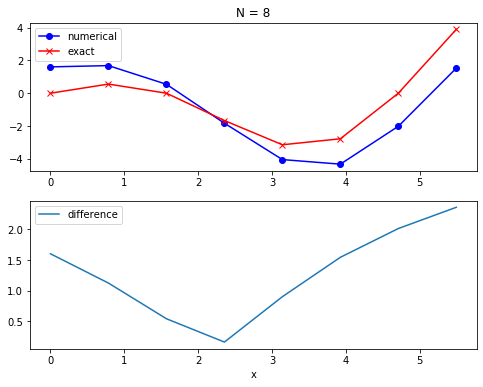

N =  8
L1-error: 8.057235022613717
L2-error: 3.6540040574655275
Linf-error: 2.361861228657427 

the loop has ended


In [15]:
N_vec = 2**np.arange(3, 4)
L1_vec = []
L2_vec = []
Linf_vec = []

gamma = 1.

for N in N_vec:
    h = L/N
    print('number of cells: ', N, '\ngrid parameter: h =', h)
    Xs = np.linspace(a, b, N + 1)
    print('number of grid points: ', np.size(Xs))
    x = Xs[:-1]
    print('size of x:', np.size(x), '\n')
    
    rho_h = rho(x)
    
    dd = np.diag(np.ones(N)*2)
    dd1 = np.diag(np.ones(N-1)*(-1), k= 1)
    dd2 = np.diag(np.ones(N-1)*(-1), k= -1)
    A = dd + dd1 + dd2
    A[0, -1] = -1.
    A[-1, 0] = -1.
    print(A)
    lam_vec = np.linalg.eigvals(A)
    print('smallest eigenvalue: ', np.min(np.abs(lam_vec)))
    A[-1, :] = 0.
    A[-1, -1] = 1.
    rho_h[-1] + 0.
    print(A)
    lam_vec = np.linalg.eigvals(A)
    print('smallest eigenvalue: ', np.min(np.abs(lam_vec)))
    A /= h**2
    
    A_inv = np.linalg.inv(A)
    phi_h = np.dot(A_inv, rho_h)
    plt.figure
    plt.subplot(211)
    plt.plot(x, phi_h, 'ob-', label='numerical')
    plt.plot(x, phi_exact(x), 'xr-', label='exact')
    plt.title('N = ' + str(N))
    plt.legend()
    plt.subplot(212)
    plt.plot(x, np.abs(phi_h - phi_exact(x)), label='difference')
    plt.legend()
    plt.xlabel('x')
    plt.show()
    
    L1 = h*np.sum(np.abs(phi_h - phi_exact(x)))
    L2 = np.sqrt(h*np.sum(np.abs(phi_h - phi_exact(x))**2))
    Linf = np.max(np.abs(phi_h - phi_exact(x)))
    print('N = ', N)
    print('L1-error:', L1)
    print('L2-error:', L2)
    print('Linf-error:', Linf, '\n')
    
    L1_vec.append(L1)
    L2_vec.append(L2)
    Linf_vec.append(Linf)
    
print('the loop has ended')